### Importing Modules

In [82]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [85]:
import pandas as pd
from tqdm import tqdm
import os
import shutil

### Read CSV data

In [86]:
data = pd.read_csv('../Workspace/RFMDI Dataset/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
data.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Classify data based on Disease Risk from CSV data

In [87]:
abnrml_path='../Workspace/RFMDI Dataset/Training_Set/Training_Set/Training/abnrml'
nrml_path='../Workspace/RFMDI Dataset/Training_Set/Training_Set/Training/nrml'
for i in range(len(data['ID'])):
    if data['Disease_Risk'][i] == 1:
        shutil.copy(os.path.join(seg_path,str(data['ID'][i])+'.png'),abnrml_path)
    elif data['Disease_Risk'][i] == 0:
        shutil.copy(os.path.join(seg_path,str(data['ID'][i])+'.png'),nrml_path)

        x_train=[]
for img in tqdm(os.listdir(abnrml_path)):    
    image_path=abnrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_train.append(img_arr)

for img in tqdm(os.listdir(nrml_path)):    
    image_path=nrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_train.append(img_arr)

### Ploting the classified images

### Train data

In [90]:
x_train=[]
for img in tqdm(os.listdir(abnrml_path)):    
    image_path=abnrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_train.append(img_arr)

for img in tqdm(os.listdir(nrml_path)):    
    image_path=nrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_train.append(img_arr)

100%|████████████████████████████████████████████████████████████████████████████████| 401/401 [00:39<00:00, 10.11it/s]


In [ ]:
abnrml_path='../Workspace/RFMDI Dataset/Training_Set/Training_Set/Training/abnrml'
nrml_path='../Workspace/RFMDI Dataset/Training_Set/Training_Set/Training/nrml'

y_train=[]
for img in tqdm(os.listdir(abnrml_path)):    
    image_path=abnrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    y_train.append(img_arr)

for img in tqdm(os.listdir(nrml_path)):    
    image_path=nrml_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    y_train.append(img_arr)

In [91]:
x_train

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [92]:
train_x=np.array(x_train)

In [94]:
train_x.shape

(1920, 224, 224, 3)

In [95]:
train_x=train_x/255.0

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [100]:
training_set = train_datagen.flow_from_directory('../Workspace/RFMDI Dataset/Training_Set/Training_Set/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')


Found 1920 images belonging to 2 classes.


In [101]:
training_set.class_indices

{'abnrml': 0, 'nrml': 1}

In [102]:
train_y=training_set.classes

In [104]:
train_y.shape

(1920,)

In [106]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [107]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 177s 2us/step


In [108]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [109]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

In [110]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [111]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [112]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model

In [114]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  #validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
60/60 [==============================] - 871s 15s/step - loss: 0.6068 - accuracy: 0.7823
Epoch 2/10
60/60 [==============================] - 846s 14s/step - loss: 0.3933 - accuracy: 0.8266
Epoch 3/10
60/60 [==============================] - 848s 14s/step - loss: 0.3506 - accuracy: 0.8427
Epoch 4/10
60/60 [==============================] - 840s 14s/step - loss: 0.3095 - accuracy: 0.8646
Epoch 5/10
60/60 [==============================] - 840s 14s/step - loss: 0.2984 - accuracy: 0.8766
Epoch 6/10
60/60 [==============================] - 840s 14s/step - loss: 0.2969 - accuracy: 0.8651
Epoch 7/10
60/60 [==============================] - 826s 14s/step - loss: 0.2681 - accuracy: 0.8859
Epoch 8/10
60/60 [==============================] - 910s 15s/step - loss: 0.2546 - accuracy: 0.8922
Epoch 9/10
60/60 [==============================] - 867s 14s/step - loss: 0.2544 - accuracy: 0.8974
Epoch 10/10
60/60 [==============================] - 825s 14s/step - loss: 0.2299 - accuracy: 0.9047

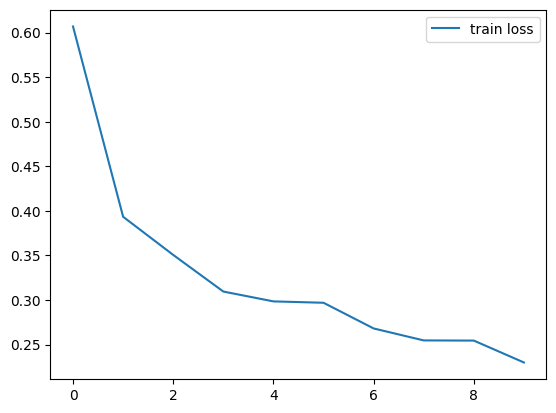

In [119]:
# loss
plt.plot(history.history['loss'], label='train loss')
#plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

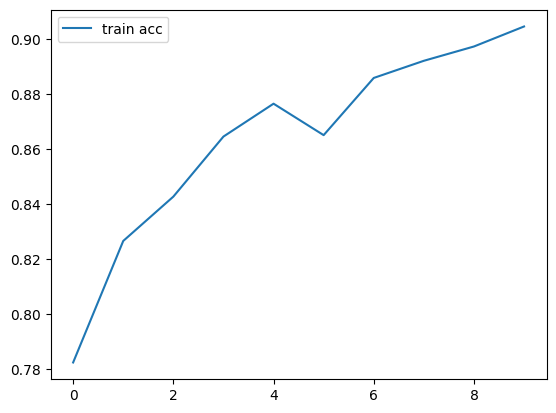

In [120]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
#plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [ ]:
x_train=[]

for img in os.listdir(sub_path):    
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224,224))
    x_train.append(img_arr)
    
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)